In [1]:
import b2d
import numpy as np
import b2d.plot
import matplotlib.pyplot as plt
from IPython.display import HTML
import random
from b2d.testbed import TestbedBase
from b2d.testbed.backend.jupyter import JupyterGui
from matplotlib.animation import ImageMagickWriter
import copy
import math
from scipy.spatial import Delaunay

In [2]:
def ellipse_chain_shape(positon, a, b, n=50):

    t = np.linspace(start=0, stop=2.0 * np.pi, num=n + 1)
    x = (a * np.cos(t) + positon[0])[:-1]
    y = (b * np.sin(t) + positon[1])[:-1]
    verts = np.stack([x, y], -1)
    verts = np.require(verts, requirements=["C"])
    #print(np.flip(verts, axis=0))
    arr=np.flip(verts, axis=0)
    #print(arr,arr[0],arr[:, 0])
    x = arr[:, 0]
    y = arr[:, 1]
    

    

    # combine x and y coordinates and convert to tuple
    result = list(zip(x, y))
    #print(result)
    
    return result





def generate_tuples(n):
    tuples_list = [(random.randint(5, 45),random.randint(5, 45))]
    while len(tuples_list)<n:
        x = random.randint(5, 45)
        y = random.randint(5, 45)
        tuples_list=add_new_point(tuples_list, x, y, 5)
    return tuples_list



def distance(p1, p2):
    
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def add_new_point(tuples_list, x_new, y_new, d):
    
    new_point = (x_new, y_new)
    for point in tuples_list:
        if distance(point, new_point) < d:
            return tuples_list
    

    tuples_list.append(new_point)
    return tuples_list



In [138]:
print(stop)
world = b2d.world(gravity=(0, 0))
pdef = b2d.particle_system_def(radius=0.1,elastic_strength=50)
psystem = world.create_particle_system(pdef)


dimensions = [30, 30]
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(
    position=(0, 0), fixtures=b2d.fixture_def(shape=box_shape, friction=0)
)

NameError: name 'stop' is not defined

In [139]:
emitter_pos = (0.1, 0)
emitter_def = b2d.RandomizedLinearEmitterDef()
emitter_def.emite_rate = 40
emitter_def.lifetime = 20.1
emitter_def.size = (2, 1)
# emitter_def.transform = b2d.Transform(emitter_pos, b2d.Rot(0))
emitter_def.velocity = (-40, 20)
emitter = b2d.RandomizedLinearEmitter(psystem, emitter_def)

NameError: name 'psystem' is not defined

In [ ]:
#fig, ax, ani = b2d.plot.animate_world(
#    world, ppm=20, bounding_box=((-10, -20), (20, 15)), pre_step=emitter.step, t=5
#)
#ani
#plt.show()
#HTML(ani.to_jshtml())
#IPython.display.HTML

In [ ]:
class ColorMixing(TestbedBase):

    name = "ColorMixing"

    def __init__(self, settings=None):
        super(ColorMixing, self).__init__(settings=settings)
        dimensions = [30, 30]

        # the outer box
        box_shape = b2d.ChainShape()
        box_shape.create_loop(
            [
                (0, 0),
                (0, dimensions[1]),
                (dimensions[0], dimensions[1]),
                (dimensions[0], 0),
            ]
        )
        box = self.world.create_static_body(position=(0, 0), shape=box_shape)

        fixtureA = b2d.fixture_def(
            shape=b2d.circle_shape(1), density=2.2, friction=0.2, restitution=0.5
        )
        body = self.world.create_dynamic_body(position=(13, 10), fixtures=fixtureA)

        pdef = b2d.particle_system_def(
            viscous_strength=0.9,
            spring_strength=0.0,
            damping_strength=0.5,
            pressure_strength=0.5,
            color_mixing_strength=0.008,
            density=2,
        )
        psystem = self.world.create_particle_system(pdef)
        psystem.radius = 0.3
        psystem.damping = 1.0

        colors = [
            (255, 0, 0, 255),
            (0, 255, 0, 255),
            (0, 0, 255, 255),
            (255, 255, 0, 255),
        ]
        posiitons = [(6, 10), (20, 10), (20, 20), (6, 20)]
        for color, pos in zip(colors, posiitons):

            shape = b2d.polygon_shape(box=(5, 5), center=pos, angle=0)
            pgDef = b2d.particle_group_def(
                flags=b2d.ParticleFlag.waterParticle
                | b2d.ParticleFlag.colorMixingParticle,
                # group_flags=b2d.ParticleGroupFlag.solidParticleGroup,
                shape=shape,
                strength=1.0,
                color=color,
            )
            group = psystem.create_particle_group(pgDef)



In [ ]:

#b2d.loop_shape(np.flip(verts, axis=0))


dimensions = [30, 30]
world=b2d.world(gravity=(0, 0))
# the outer box
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(position=(0, 0), shape=box_shape)

#fixtureA = b2d.fixture_def(
#    shape=b2d.circle_shape(1), density=2.2, friction=0.2, restitution=0.5
#)
#body = world.create_dynamic_body(position=(13, 10), fixtures=fixtureA)

pdef = b2d.particle_system_def(
    viscous_strength=0.9,
    spring_strength=0.8,
    damping_strength=0.5,
    pressure_strength=0.5,
    color_mixing_strength=0.108,
    density=2,
    elastic_strength=0.8
)
psystem = world.create_particle_system(pdef)
psystem.radius = 0.3
psystem.damping = 1.0

colors = [
    (255, 0, 0, 255),
    (0, 255, 0, 255),
    (0, 0, 255, 255),
    (255, 255, 0, 255),
]
verts=[(0, 0),(0, dimensions[1]),(dimensions[0], dimensions[1]),(dimensions[0], 0)]
#print('verts0',verts)
posiitons = [(8, 19), (20, 10), (20, 20), (6, 20)]
for color, pos in zip(colors, posiitons):
    a=2*np.random.random_sample()-1
    b=2*np.random.random_sample()-1
    verts=ellipse_chain_shape(pos, 5+a, 4.5+b, n=11),
    #print('verts1',verts[0])

    #shape = b2d.polygon_shape(box=(5, 5), center=pos, angle=0)
    pgDef = b2d.particle_group_def(
        flags=b2d.ParticleFlag.elasticParticle,
        #| b2d.ParticleFlag.colorMixingParticle,
        group_flags=b2d.ParticleGroupFlag.solidParticleGroup,
        linear_velocity=(2*np.random.random_sample()-2, 2*np.random.random_sample()-2),
        shape=b2d.polygon_shape(center=pos, vertices=verts[0]),#b2d.polygon_shape(center=pos, vertices=verts),#ellipse_chain_shape(pos, 5, 2, n=500),#b2d.circle_shape(3,pos)
        strength=1.0,
        color=color,
    )
    group = psystem.create_particle_group(pgDef)
    #print(group.linear_velocity)
    #help(group)


In [ ]:
fig, ax, ani = b2d.plot.animate_world(world,t=10)
#help(world)
#print(world.find_body((8, 19), margin=50))
#print(world.find_closest_n_particles((8, 19), r=50))
HTML(ani.to_jshtml())
#with open('animation.html', 'w') as f:
#    f.write(html.data)
    
#writer = ImageMagickWriter(fps=30)

# save the animation as a GIF
#ani.save('animation.gif', writer=writer)

In [32]:
def star_shape(positon, a, b, n=10):

    t = np.linspace(start=0, stop=2.0 * np.pi, num=n)
    #print(t)
    #x = (a * np.cos(t) + positon[0])[:-1]
    #y = (b * np.sin(t) + positon[1])[:-1]
    r=0.2 * np.random.randn(n) + 2
    r[-1]=r[0]
    #al=np.sort(2*np.pi*np.random.random_sample((n,)))
    #print(al)
    os=0.2 * np.random.randn() + 2
    x_0=np.array([positon[0]])
    y_0=np.array([positon[1]])
    x=r*np.cos(t+os)+positon[0]
    y=r*np.sin(t+os)+positon[1]
    
    
    
    x_org=copy.deepcopy(x).tolist()
    y_org=copy.deepcopy(y).tolist()
    
    r_in = r/2
    x_in=r_in*np.cos(t+os)+positon[0]
    y_in=r_in*np.sin(t+os)+positon[1]
    
    #print('x_org',x_org)
    
    #x=x.tolist()
    #y=y.tolist()
    x=[x_org[0]]
    y=[y_org[0]]
    

    for i in range(len(x_org)):
        x0, y0 = x_org[i], y_org[i]
        try:
            x1, y1 = x_org[i + 1], y_org[i + 1]
            n_interpolations = n_dens(1/(np.sqrt(2)*0.2),x_org[i], y_org[i],x_org[i + 1], y_org[i + 1])
            flag=True
        except:
            x1, y1 = x_org[0], y_org[0]
            n_interpolations = n_dens(1/(np.sqrt(2)*0.2),x_org[i], y_org[i],x_org[0], y_org[0])
            flag=False
        
        dx = (x1 - x0) / (n_interpolations + 1)
        for j in range(n_interpolations):
            x_interpolated = x0 + (j + 1) * dx
            y_interpolated = y0 + (x_interpolated - x0) * ((y1 - y0) / (x1 - x0))
            #print('x_int',x_interpolated)
            x.append(x_interpolated)
            y.append(y_interpolated)
        if flag:
            x.append(x1)
            y.append(y1)  
            
            
        


    
    #x=x+x_org
    #y=y+y_org
    x=np.array(x)
    y=np.array(y)
    
    x=np.append(x_0,x)
    y=np.append(y_0,y)
    
    
    x_in=np.append(x_0,x_in)
    y_in=np.append(y_0,y_in)
    #print('x',x)
    #print('y',y)
    
    l=len(x)
    
    
    
    
    
    
    
    
    
    
    
    verts = np.stack([x, y], -1)
    verts = np.require(verts, requirements=["C"])
    #print(np.flip(verts, axis=0))
    arr=np.flip(verts, axis=0)
    #print(arr,arr[0],arr[:, 0])
    x = arr[:, 0]
    y = arr[:, 1]
    
    #print('x2',x)

    

    # combine x and y coordinates and convert to tuple
    result = list(zip(x, y))
    #print(result)
    
    
    
    verts_in = np.stack([x_in, y_in], -1)
    verts_in = np.require(verts_in, requirements=["C"])

    arr_in=np.flip(verts_in, axis=0)

    x_in = arr_in[:, 0]
    y_in = arr_in[:, 1]
    
    result_in = list(zip(x_in, y_in))
    
    return result,l,result_in


def leng(tup_a,tup_b):
    dx=tup_a[0]-tup_b[0]
    dy=tup_a[1]-tup_b[1]
    return np.sqrt((dx**2)+(dy**2))

def n_dens(d,x1,y1,x2,y2):
    l=leng((x1,y1),(x2,y2))
    return int(l*d)


def int_corners(point_list,n):
    
    for i in range(len(point_list)-1):
        p1 = point_list[i]
        p2 = point_list[i+1]
        if i % n == n-1:
            mean = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
            point_list.insert(i+1, mean)
            
    return point_list
    

In [36]:
world=b2d.world(gravity=(0, 0))
# the outer box
dimensions = [50, 50]
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(position=(0, 0), shape=box_shape)

bodies = []

# create  a static body as anchor
#b = world.create_static_body(
#    position=(0, 4), fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.3, 0.5]))
#)
#bodies.append(b)
posiitons = generate_tuples(10)

for pos in posiitons:
    bodies = []
    bodies_in=[]
    verts,l,verts_in=star_shape(pos, 1, 1, n=12)
    #print('v',verts)
    v1=2*np.random.random_sample()-1
    v2=2*np.random.random_sample()-1
    print('l',l)
    for i in range(l):
        #print(verts[i])
        
        b = world.create_dynamic_body(
            position=verts[i],
            fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.2, 0.2]), density=0.1),
            linear_damping=0,
            angular_damping=0,
            linear_velocity=(20*v1,20*v2),
        )
        bodies.append(b)
#create_distance_joint(anchor, body, length=10, stiffness=0.5 * (i + 1))
    for k in range(len(bodies_in)):
        b = world.create_dynamic_body(
            position=verts[i],
            fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.2, 0.2]), density=0.1),
            linear_damping=0,
            angular_damping=0,
            linear_velocity=(20*v1,20*v2),
        )
        
        bodies_in.append(b)
        
    for j in range(len(bodies) - 1):
        if j!=len(bodies) - 2:
            
            a = bodies[j]
            b = bodies[j + 1]
            #print(a.world_center)
            world.create_distance_joint(
                a,
                b,
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(a.world_center,b.world_center),
                stiffness=10**6,
            )
            
            #world.create_weld_joint(
             #   a,
             #   b,
             #   local_anchor_a=(0.2, -0.2),
             #   local_anchor_b=(-0.2, -0.2),
             #   damping=0.1,
             #   reference_angle=0,
             #   stiffness=10**8,
            #)
            
            
            a = bodies[-1]
            b = bodies[j]
            
            world.create_distance_joint(
                a,
                b,
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(a.world_center,b.world_center),
                stiffness=10,
            )
            
            #world.create_weld_joint(
            #    a,
            #    b,
            #    local_anchor_a=(0.2, -0.2),
            #    local_anchor_b=(-0.2, -0.2),
            #    damping=0.1,
            #    reference_angle=0,
            #    stiffness=10**7,
            #)
            
    world.create_distance_joint(
                bodies[-2],
                bodies[0],
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(bodies[-2].world_center,bodies[0].world_center),
                stiffness=10**6,
            )
    
    world.create_distance_joint(
                bodies[-1],
                bodies[-2],
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(bodies[-2].world_center,bodies[-1].world_center),
                stiffness=10,
            )
    
    #world.create_weld_joint(
    #        bodies[-2],
    #        bodies[0],
    #        local_anchor_a=(0.2, -0.2),
    #        local_anchor_b=(-0.2, -0.2),
    #        damping=0.1,
    #        reference_angle=0,
    #        stiffness=10**8,
    #    )
    

#print(world.find_closest_n_bodies((8, 19), r=50)((8, 19), margin=50))

print(verts_in)

l 54
l 54
l 48
l 53
l 50
l 54
l 51
l 50
l 56
l 54
[(22.699569359361934, 38.886436039427394), (23.24725474369428, 38.99133520029081), (23.80280894208734, 38.75568243501212), (23.888841444190096, 38.165390414609156), (23.96199420348305, 37.60768067916662), (23.60240493557746, 37.142424496375554), (23.038720535278678, 37.06003926599409), (22.547354693669753, 37.22750820885939), (22.066625442537852, 37.526382942960964), (22.031021277486882, 38.098816941589156), (22.02319112009407, 38.77838703865866), (22.699569359361934, 38.886436039427394), (23.0, 38.0)]


/home/mo/anaconda3/envs/pysics/lib/python3.10/site-packages/b2d/plot.py:128: UserWarning: You passed in an explicit save_count=145 which is being ignored in favor of frames=145.
  ani = animation.FuncAnimation(


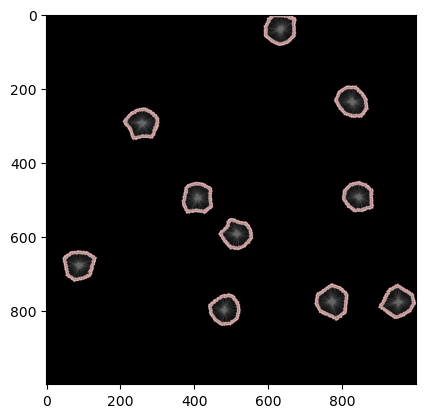

In [37]:
fig, ax, ani = b2d.plot.animate_world(world,t=6)
#help(world)
#print(world.find_body((8, 19), margin=50))
HTML(ani.to_jshtml())

[12  8  7]
[12  5  4]
[12  9  8]
[ 6 12  7]
[ 6  5 12]
[ 9 11 10]
[11  9 12]
[ 3 12  4]
[ 3  2 12]
[ 2  1 12]
[ 1 11 12]
[11  1 10]
[23.         22.06662544 22.54735469]
[23.         23.60240494 23.9619942 ]
[23.         22.03102128 22.06662544]
[23.03872054 23.         22.54735469]
[23.03872054 23.60240494 23.        ]
[22.03102128 22.69956936 22.02319112]
[22.69956936 22.03102128 23.        ]
[23.88884144 23.         23.9619942 ]
[23.88884144 23.80280894 23.        ]
[23.80280894 23.24725474 23.        ]
[23.24725474 22.69956936 23.        ]
[22.69956936 23.24725474 22.02319112]


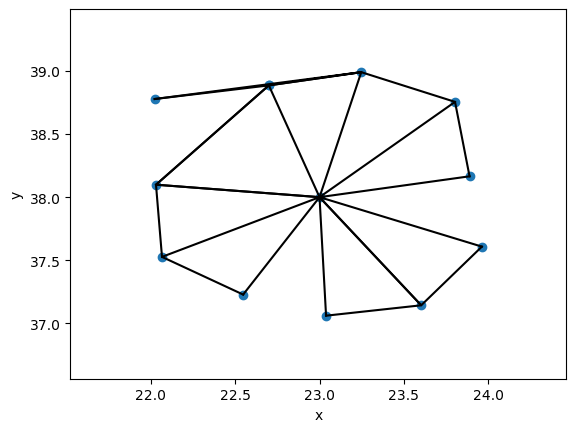

In [41]:
# List of tuples representing points in a plane
points = verts_in#verts+verts_in

# Convert the list of tuples to a numpy array
point_array = np.array(points)

# Perform Delaunay triangulation
triangulation = Delaunay(point_array)

# Print the indices of the vertices for each triangle
for triangle in triangulation.simplices:
    print(triangle)
    
    
    
plt.plot(point_array[:,0], point_array[:,1], 'o')

# Plot the Delaunay triangulation
for triangle in triangulation.simplices:
    print(point_array[triangle,0])
    plt.plot(point_array[triangle,0], point_array[triangle,1], 'k-')

# Set the plot limits and axis labels
plt.xlim([min(point_array[:,0])-0.5, max(point_array[:,0])+0.5])
plt.ylim([min(point_array[:,1])-0.5, max(point_array[:,1])+0.5])
plt.xlabel('x')
plt.ylabel('y')

# Display the plot
plt.show()

In [31]:
point_list = [(1,4),(2,3.5),(3,3),(4,3.5),(5,4.5)]
n = 3  # number of steps




print(point_list)

[(1, 4), (2, 3.5), (3, 3), (3.5, 3.25), (4, 3.5), (5, 4.5)]
